In [17]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from itertools import combinations
from scipy.cluster.hierarchy import DisjointSet
from tqdm import tqdm
import itertools

%matplotlib inline


## Prep code that loads data

We will use LesMis, Marvel and G(n,p) networks that we have seen in the first two weeks

In [2]:
# load a network of co-occurrences of the characters in Les Miserables by Victor Hugo
# See the following two pages about the history and potential issues of Knuth's original version of the dataset
# https://github.com/MADStudioNU/lesmiserables-character-network
# https://www-cs-faculty.stanford.edu/~knuth/sgb.html
lesmis_graph = nx.les_miserables_graph()

# print some basic network quantities so that we get a basic understading of this data
print('total number nodes and edges', lesmis_graph.number_of_nodes(), lesmis_graph.number_of_edges() ) 
print ('average number of edges per node', lesmis_graph.number_of_edges()/lesmis_graph.number_of_nodes())
print ('density of the Les Miserables social network', nx.density(lesmis_graph))

# the wikipedia page of Les Mis contains descriptions of the storyline, main characters
# and its overall significance
# https://en.wikipedia.org/wiki/Les_Mis%C3%A9rables

total number nodes and edges 77 254
average number of edges per node 3.2987012987012987
density of the Les Miserables social network 0.08680792891319207


In [3]:
### Marvel Hero data
# home page for the data http://syntagmatic.github.io/exposedata/marvel/

# borrowing functions and processing from here 
# https://medium.com/@jmandalihan.msds2023/exploring-the-marvel-universe-through-network-analysis-a-starters-guide-88eb40e85c47
# Load data from the CSV file

def load_data_from_csv(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row
        for row in reader:
            data.append((row[0], row[1]))
    return data


In [4]:


# download this file http://syntagmatic.github.io/exposedata/marvel/data/hero-network.csv
# CHANGE THE NEXT LINE TO YOUR FILE PATH
marvel_hero_file = './graph-dataset/hero-network.csv'
raw_data = load_data_from_csv(marvel_hero_file)

len(raw_data)

574466

In [5]:
# Create a directed graph
hero_graph = nx.Graph()

# Add edges from the dataset
for edge in raw_data:
    hero_graph.add_edge(edge[0], edge[1])
    
print('total number nodes and edges', hero_graph.number_of_nodes(), hero_graph.number_of_edges() ) 
print ('average number of edges per node', hero_graph.number_of_edges()/hero_graph.number_of_nodes())
print ('density of the Hero social network', nx.density(hero_graph))


total number nodes and edges 6426 167219
average number of edges per node 26.022253345782758
density of the Hero social network 0.00810031232553549


In [6]:
## find the connected components of both graphs

lesmis_components = [lesmis_graph.subgraph(c).copy() for c in nx.connected_components(lesmis_graph)] 
print ([len(c) for c in sorted(lesmis_components, key=len, reverse=True)])


hero_components = [hero_graph.subgraph(c).copy() for c in nx.connected_components(hero_graph)] 
print ([len(c) for c in sorted(hero_components, key=len, reverse=True)])


[77]
[6408, 9, 7, 2]


## Question 1 Components of G(n, p) 

The goal of this excercise is to generate the k-S figure as shown in Fig 3.18 (b) in the Network Science book. 
    
That is to say, first initialise a graph with $n=1,000$ nodes. Then gradually add edges among these nodes, find the size of the largest component at different values of expected degree `<k>`, and plot it! 

<!-- <img src="http://networksciencebook.com/images/ch-03/figure-3-18.jpg" width=600/> -->

* Starting from $k=0.1$ edges per node, and the corresponding value of $p$, (which will correspond to an average of how many edges per node?), generate G(n, p) using NetworkX built-in function, and then also use NetworkX built-in function to find the connected components. Increment $k$ at $0.1$ (or slightly larger if you are impatient) and do this again and again until you see the shape of Fig 3.18 (b) emerging. 
  * What is the computational time (in big-O terms) for generating a G(n, p) graph?
  * What is an example value of p and average degree k that we should be stopping at? 
  * If this code was taking a long time to run (and debug), then run it with a much smaller $n$ (say 50) to first check its correctness. 

* Do this multiple times and plot the result (or key statistics of k vs S) on the same figure. 
  * Why would one want to run this code multiple times? 
  
* What is an underlying algorithm that you could use to find connected components? (or what do you think is under the hood for `networkx.connected_components`) What is its running time? 


0:00:09.315591: run number 0, final k = 3.00 
[5, 17, 16, 37, 127, 795, 2026, 2643, 2876, 3265, 3342, 3529, 3571, 3685]
0:00:09.168497: run number 1, final k = 3.00 
[7, 15, 16, 45, 298, 1253, 2030, 2623, 2952, 3131, 3451, 3517, 3569, 3711]
0:00:09.176329: run number 2, final k = 3.00 
[6, 12, 27, 76, 129, 1262, 2111, 2567, 2884, 3189, 3376, 3482, 3599, 3681]
0:00:09.178160: run number 3, final k = 3.00 
[5, 11, 18, 49, 178, 1366, 2120, 2575, 2962, 3233, 3371, 3537, 3591, 3719]
0:00:09.192273: run number 4, final k = 3.00 
[6, 18, 24, 35, 165, 1446, 1992, 2576, 3045, 3178, 3411, 3538, 3582, 3707]


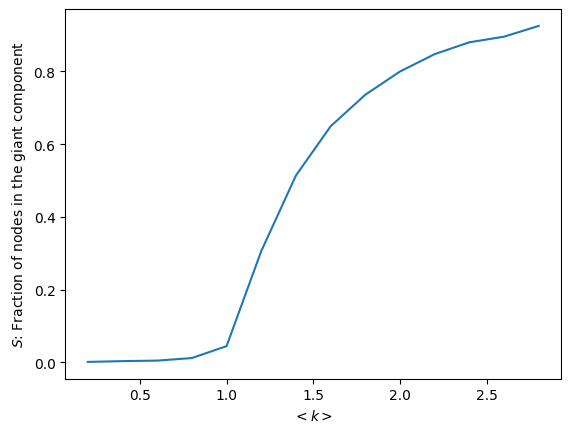

In [12]:
n = 4000 # number of nodes
num_rerun = 5 #number of different re-runs 
k_init = 0.2       # average degree and its increment
k_increment = 0.2 
k_max = 3
S_sum = np.zeros(int((k_max - k_init)/k_increment) + 1)
k_simulated = []
for i in range(num_rerun):
    tic = datetime.now()
    cur_k = k_init
    comp_size = []
    while cur_k < k_max:
        ###################################
        """
           put your code here, append each result at cur_k into the list comp_size
        """
        #generate a raandom graph with n nodees and average degree cur_k
        G = nx.erdos_renyi_graph(n, cur_k/n)
        #find the largest connected component
        result_k = len(max(nx.connected_components(G), key=len))
        ###################################
        comp_size.append(result_k)
        
        if i==0:
            k_simulated.append(cur_k)
        cur_k += k_increment
    toc = datetime.now()
    print("%s: run number %d, final k = %0.2f " % (toc - tic, i, cur_k) )
    print(comp_size)
    S_sum += comp_size
    


# Plotting Routine, no need to change
S = S_sum/(num_rerun*n)
plt.xlabel("$<k>$")
plt.ylabel("$S$: Fraction of nodes in the giant component")
plt.plot(k_simulated, S)



## Question 2.1 - Making it run faster (part 1)

How much time did the code in Q1 took to run (and loop through)? Insert some code to measure its run time on your computer. Write down the aymptotic run time in big-O terms. 

Let's try speeding it up. 

First notice that as we loop through different values of $p$, each G(n, p) random graph is generated from scratch. We could do better by letting graphs of a smaller $p$ having a subset of edges of another random graph with a larger $p$, i.e. adding a certain number of edges at a time. 
* How do we ensure that each of these graphs are still valid G(n, p) 
* How much run time will this require, in big-O terms? 
* What additional data do you now need to keep track of? 

0:00:03.877503: run number 0, final k = 3.00 
0:00:03.792163: run number 1, final k = 3.00 
0:00:03.776107: run number 2, final k = 3.00 
0:00:03.788364: run number 3, final k = 3.00 
0:00:03.797164: run number 4, final k = 3.00 


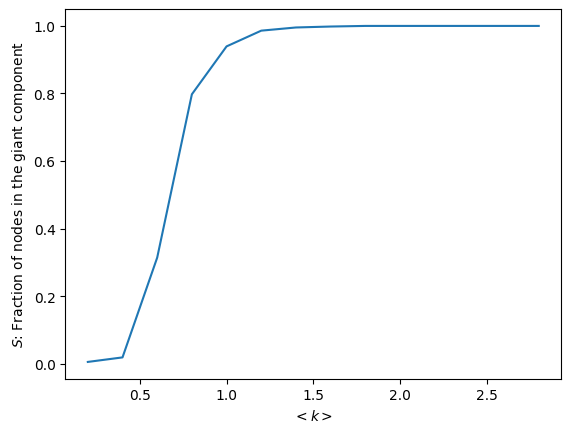

In [20]:
"""
1. For every edge generate in p, if it will still present in new graph ?
2. for ever edge not generated in p, will it be generated in a new graph.?
still n^2
"""
"""
1. Calculate current number of edges
2. Calculate the expected num of edges in the new graph
3. For the different, calculate the probability of the edge being present in the new graph(unconnected nodes)
"""
n = 4000
k_init = 0.2       # average degree and its increment
k_increment = 0.2 
#k_max = 1.5*np.log(n) # why do we choose this value of k to stop? 
k_max = 3
num_rerun = 5
S_sum = np.zeros(int((k_max - k_init)/k_increment) + 1)
k_simulated = []

for i in range(num_rerun):
    """
       insert some code here, generate your initial graph and ...
    """

    cur_k = k_init
    G = nx.erdos_renyi_graph(n, 0)
    comp_size = []
    tic = datetime.now()
    while cur_k < k_max:
        ###################################
        """
           put your code here, append each result at cur_k into the list comp_size
        """
        #modify the graph here
        #calculate the current number of edges
        cur_edges = G.number_of_edges()
        #calculate the expected number of edges
        expected_edges = (cur_k*n)/2
        #calculate the probability of the edge being present in the new graph
        p = expected_edges/((n*(n-1)/2)-cur_edges)
        # for every nodes not connected to eachother genrate random edge accoring to p
        nodes = list(G.nodes())
        for u,v in itertools.combinations(nodes, 2):
            if not G.has_edge(u,v):
                if np.random.rand() < p:
                    G.add_edge(u,v)
        
        result_k = len(max(nx.connected_components(G), key=len))
        ###################################
        comp_size.append(result_k)
        if i==0:
            k_simulated.append(cur_k)
        cur_k += k_increment
    toc = datetime.now()
    print("%s: run number %d, final k = %0.2f " % (toc - tic, i, cur_k) )
    S_sum += comp_size

# Plotting Routine, no need to change
S = S_sum/(num_rerun*n)
plt.xlabel("$<k>$")
plt.ylabel("$S$: Fraction of nodes in the giant component")
plt.plot(k_simulated, S)

## Question 2.2 - Making it run faster (part 2)

The main idea of the above is to share computation across different random graphs. 
Can we do this for finding the largest component as well? 

One idea is to keep track of the components as we add edges, and each edge will either be living entirely within a current component, or merge two current components (is there a third scenario?) 

* How much run time will this require, in big-O terms? 
* What additional data do you now need to keep track of? (hint: hash table?) 

Hint: Check https://en.wikipedia.org/wiki/Disjoint-set_data_structure

In [ ]:
n = 4000
k_init = 0.2       # average degree and its increment
k_increment = 0.2 
k_max = 3
num_rerun = 5
S_sum = np.zeros(int((k_max - k_init)/k_increment) + 1)
k_simulated = []

for i in range(num_rerun):
    """
       insert some code here, generate your initial graph and ...
    """
    cur_k = k_init
    comp_size = []
    tic = datetime.now()
    while cur_k < k_max:
        ###################################
        """
           put your code here, append each result at cur_k into the list comp_size
        """
        result_k = 0 # Change this
        
        
        ###################################
        comp_size.append(result_k)
        if i==0:
            k_simulated.append(cur_k)
        cur_k += k_increment

    toc = datetime.now()
    print("%s: run number %d, final k = %0.2f " % (toc - tic, i, cur_k) )
    S_sum += comp_size

# Plotting Routine, no need to change
S = S_sum/(num_rerun*n)
plt.xlabel("$<k>$")
plt.ylabel("$S$: Fraction of nodes in the giant component")
h = plt.plot(k_simulated, S)

## Question 2 

Where should the LesMis and Marvel networks sit on your k-S plot above? Can you place each of them there as a point? 

In [ ]:
"""
   insert some code to add the two network to the plot generated above
   make use of plot handle h
"""

## Question 3

Visualise small components using the built-in function of networkx.


In [ ]:

# put your code here 

## Question 4 Navigation 

The goal is to reproduce Figure 20.6 in in the EK book, or Figure 1b in Kleinberg's nature paper



In [ ]:

# Construct Graph
n = 200
G = nx.grid_2d_graph(n, n, periodic=False, create_using=None)
nodelist = list(G.nodes())
n_rerun = 20
r_simulate = np.linspace(0,2.5,5)
avg_steps = np.zeros(r_simulate.shape[0])
# Source
s = (0,0)
# Target
t = (199,199)
for j in tqdm(range(r_simulate.shape[0])):
    step_sum = 0
    r = r_simulate[j]
    print(r)
    for i in range(n_rerun):
        
        cur_node = s
        n_steps = 0
        while cur_node != t:
            # Generate the long-range connection
            x, y = zip(*G.nodes)
            distance = np.abs(np.array(x) - cur_node[0]) +  np.abs(np.array(y) - cur_node[1])
            prob = np.array(1/distance**r)
            prob = np.nan_to_num(prob, nan = 0, posinf = 0, neginf = 0)
            prob = prob/prob.sum()
            chosen = np.random.choice(n*n, p = prob)
            chosen_node = nodelist[chosen]
            G.add_edge(cur_node, chosen_node)
            ###################################
            """
            put your code here 

            """
            next_node = cur_node #Change this
            
            
            ###################################
            if np.abs(chosen_node[0] - cur_node[0]) + np.abs(chosen_node[1] - cur_node[1]) > 1:
                G.remove_edge(cur_node, chosen_node)
            cur_node = next_node
            n_steps += 1
        step_sum += n_steps
    avg_steps[j] = step_sum/n_rerun
    print(avg_steps[j])
    
## plotting the graph 
"""
    Can you write some code to visualise this graph with its 2-D coordinates?
    what does it look like for different values of q (or r_simulate in the template code above)
"""


## plotting code that generates EK Figure 20.6, no need to change
plt.xlabel("q")
plt.ylabel("logarithm of average number of steps")
plt.plot(r_simulate, np.log(avg_steps))
    
    
        
